<a href="https://colab.research.google.com/github/Guru-180188/Projects/blob/main/Cat_VS_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/ .kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 97% 1.03G/1.06G [00:07<00:00, 225MB/s]
100% 1.06G/1.06G [00:07<00:00, 152MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r"/content/dogs_vs_cats/train",
    batch_size=32,
    image_size=(256,256), labels="inferred",
    label_mode="int"
)
validation_ds=keras.utils.image_dataset_from_directory(
  directory=r"/content/dogs_vs_cats/test",
  batch_size=32,
  image_size=(256,256), labels="inferred",
  label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
for i in train_ds:
  print(i)

Streaming output truncated to the last 5000 lines.
         [115.46086  , 135.91008  , 123.113205 ],
         [149.62761  , 170.62761  , 152.36198  ]],

        [[220.23929  , 231.34415  , 187.7752   ],
         [226.86374  , 237.10617  , 190.61243  ],
         [243.88672  , 251.89674  , 203.10742  ],
         ...,
         [137.75626  , 156.83829  , 152.26407  ],
         [128.0507   , 148.52274  , 135.71445  ],
         [176.95264  , 198.00342  , 179.7124   ]],

        ...,

        [[165.97165  , 201.73607  , 138.23607  ],
         [179.08649  , 210.48492  , 153.28961  ],
         [177.27942  , 205.4672   , 156.02956  ],
         ...,
         [183.66641  , 223.75638  , 153.59024  ],
         [178.56367  , 220.52429  , 147.56625  ],
         [165.72556  , 207.74161  , 132.00723  ]],

        [[178.42935  , 206.81964  , 145.64224  ],
         [173.17966  , 198.16306  , 143.12692  ],
         [175.7761   , 196.7543   , 149.72891  ],
         ...,
         [181.44727  , 222.93297  , 1

In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds,epochs=25,validation_data=validation_ds)

Epoch 1/25
625/625 [==============================] - 74s 97ms/step - loss: 0.5974 - accuracy: 0.6701 - val_loss: 0.5290 - val_accuracy: 0.7270
Epoch 2/25
625/625 [==============================] - 54s 85ms/step - loss: 0.4560 - accuracy: 0.7847 - val_loss: 0.4614 - val_accuracy: 0.7842
Epoch 3/25
625/625 [==============================] - 56s 88ms/step - loss: 0.3505 - accuracy: 0.8459 - val_loss: 0.4867 - val_accuracy: 0.7846
Epoch 4/25
625/625 [==============================] - 58s 92ms/step - loss: 0.2341 - accuracy: 0.9023 - val_loss: 0.6891 - val_accuracy: 0.7694
Epoch 5/25
625/625 [==============================] - 51s 82ms/step - loss: 0.1386 - accuracy: 0.9449 - val_loss: 0.7534 - val_accuracy: 0.7888
Epoch 6/25
625/625 [==============================] - 57s 90ms/step - loss: 0.0930 - accuracy: 0.9679 - val_loss: 1.0613 - val_accuracy: 0.7802
Epoch 7/25
625/625 [==============================] - 53s 84ms/step - loss: 0.0708 - accuracy: 0.9746 - val_loss: 1.0551 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
dog_img=plt.imread(r"/content/pet.jpg")

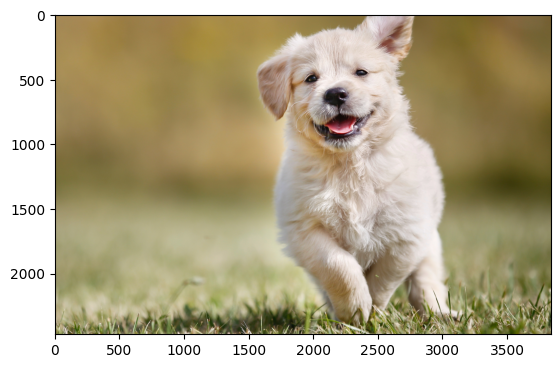

In [ ]:
plt.imshow(dog_img)

In [ ]:
cat_img=plt.imread(r"/content/pet_2.jpg")

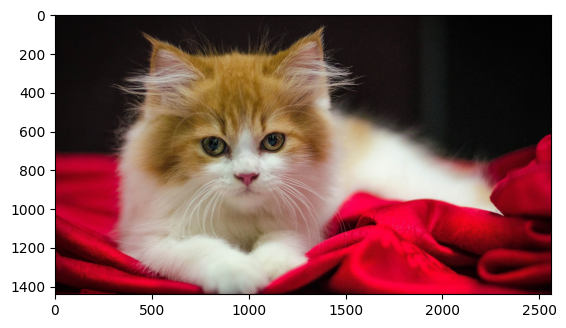

In [ ]:
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(1440, 2560, 3)

In [ ]:
cat_img.shape

(1440, 2560, 3)

In [ ]:
import cv2
dog_resize = cv2.resize(dog_img,(256,256))
cat_resize = cv2.resize(cat_img,(256,256))

In [ ]:
dog_resize.shape

(256, 256, 3)

In [ ]:
cat_resize.shape

(256, 256, 3)

In [ ]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [ ]:
dog_resize.shape

(1, 256, 256, 3)

In [ ]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [ ]:
cat_resize.shape

(1, 256, 256, 3)

In [ ]:
pred=model.predict(cat_resize)

1/1 [==============================] - 0s 23ms/step


In [ ]:
#model.predict(cat_resize)

In [ ]:
if pred == 0:
  print("this is a image of cat")
else:
  print("this is a image of dog")

this is a image of cat
